## EDA of Netflix stock data set 
#### Author: Youyeon Kim
#### Date: 26/Mar/2024

##### This dataset(https://www.kaggle.com/datasets/kirolosatef/netflex-stock-dataset-with-twitter-sentiment) is included with stock price data ranged from 1-1-2018 to 11-7-2022 and twitter sentiment data.

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Conv2D,Flatten,Dense,Dropout,MaxPooling1D
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,Bidirectional


seed = 42

In [2]:
# ! pip install --upgrade tensorflow
# !pip install --upgrade h5py
# ! pip install --upgrade matplotlib

In [3]:
df = pd.read_csv('./Final_nflx_data_2018-2022.csv')
# data.describe(include='all')
df['date'] = pd.to_datetime(df['date'])
df

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900,0.020833,10,480
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400,0.071217,24,337
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600,-0.018519,-4,216
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200,-0.019737,-6,304
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,-0.007663,-2,261
...,...,...,...,...,...,...,...,...,...,...
1132,2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5194700,-0.062315,-21,337
1133,2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300,-0.058824,-25,425
1134,2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400,-0.014870,-8,538
1135,2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500,-0.055427,-24,433


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1.137000e+03,1137.000000,1137.000000,1137.000000
mean,402.212181,408.380897,395.573237,402.128012,402.128012,7.906694e+06,-0.070298,-40.118734,491.086192
std,116.443388,117.223957,115.429014,116.216659,116.216659,6.770185e+06,0.050140,124.198738,564.227246
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06,-0.258065,-3034.000000,156.000000
25%,319.880005,325.369995,313.500000,319.959991,319.959991,4.277600e+06,-0.100877,-41.000000,304.000000
50%,370.260010,375.899994,363.329987,369.609985,369.609985,6.179900e+06,-0.067485,-24.000000,387.000000
75%,502.339996,508.549988,495.000000,502.109985,502.109985,9.623100e+06,-0.035608,-12.000000,503.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08,0.075630,110.000000,12404.000000


Text(0.5, 1.0, 'stock market of Netflix from Jan-2018 to jul-2022')

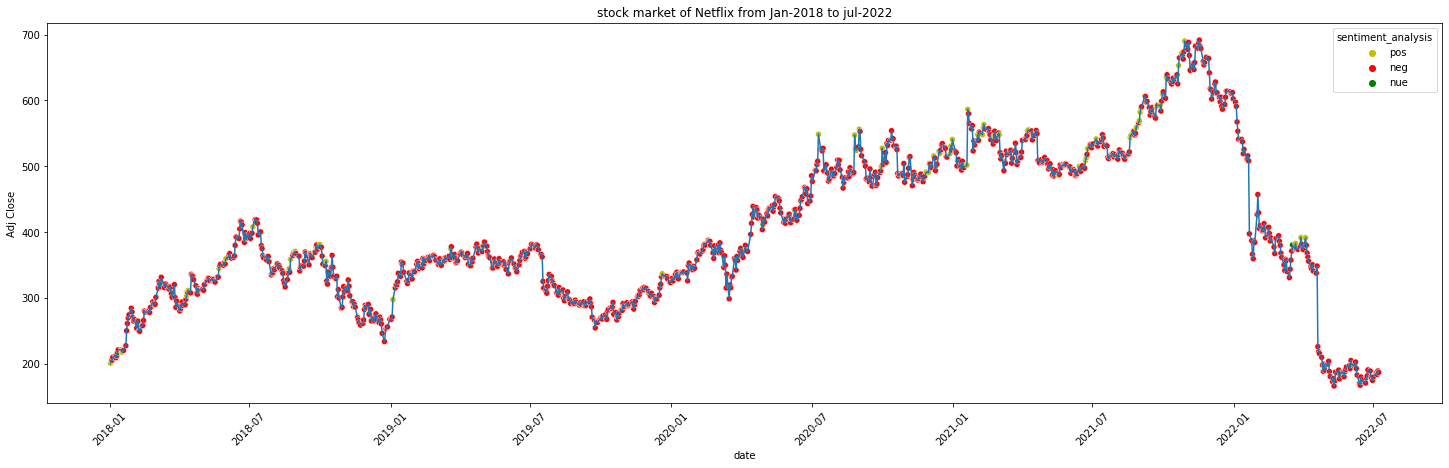

In [5]:
plt.figure(figsize=(25,7))
sns.lineplot(x=df['date'],y=df["Adj Close"])
df['sentiment_analysis'] = df['P_mean']
df['sentiment_analysis'] = df['sentiment_analysis'].apply(lambda x: 'pos' if x>0 else 'nue' if x==0 else 'neg')
sns.scatterplot(x=df["date"],y=df["Adj Close"],hue= df["sentiment_analysis"],palette=['y','r','g'])
plt.xticks(rotation = 45)
plt.title("stock market of Netflix from Jan-2018 to jul-2022")


In [6]:
df['sentiment_analysis'].value_counts()

neg    1059
pos      71
nue       7
Name: sentiment_analysis, dtype: int64

In [7]:
df=df.drop(list(range(14)),axis=0,inplace=False)
df

,date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count,sentiment_analysis
14,2018-01-23,255.050003,257.709991,248.020004,250.289993,250.289993,27705300,-0.061196,-88,1438,neg
15,2018-01-24,250.880005,261.709991,249.309998,261.299988,261.299988,17352400,-0.084525,-65,769,neg
16,2018-01-25,263.000000,272.299988,260.230011,269.700012,269.700012,15336400,-0.122744,-102,831,neg
17,2018-01-26,271.489990,274.600006,268.760010,274.600006,274.600006,11021800,-0.118012,-57,483,neg
18,2018-01-29,274.200012,286.809998,273.920013,284.589996,284.589996,17529700,-0.100690,-73,725,neg
...,...,...,...,...,...,...,...,...,...,...,...
1132,2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5194700,-0.062315,-21,337,neg
1133,2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300,-0.058824,-25,425,neg
1134,2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400,-0.014870,-8,538,neg
1135,2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500,-0.055427,-24,433,neg


In [8]:
train_dates = pd.to_datetime(df['date'])
print(train_dates.tail(15)) #Check last few dates.


1122   2022-06-16
1123   2022-06-17
1124   2022-06-21
1125   2022-06-22
1126   2022-06-23
1127   2022-06-24
1128   2022-06-27
1129   2022-06-28
1130   2022-06-29
1131   2022-06-30
1132   2022-07-01
1133   2022-07-05
1134   2022-07-06
1135   2022-07-07
1136   2022-07-08
Name: date, dtype: datetime64[ns]


In [9]:
cols = [ 'Open',
    'High', 'Low',
    'Close',
    'Volume',
    'Adj Close',
    'P_mean']
print(cols)

df_train = df[cols].astype(float)
df_train.index = df['date']
df_train

['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'P_mean']


,Open,High,Low,Close,Volume,Adj Close,P_mean
date,,,,,,,
2018-01-23,255.050003,257.709991,248.020004,250.289993,27705300.0,250.289993,-0.061196
2018-01-24,250.880005,261.709991,249.309998,261.299988,17352400.0,261.299988,-0.084525
2018-01-25,263.000000,272.299988,260.230011,269.700012,15336400.0,269.700012,-0.122744
2018-01-26,271.489990,274.600006,268.760010,274.600006,11021800.0,274.600006,-0.118012
2018-01-29,274.200012,286.809998,273.920013,284.589996,17529700.0,284.589996,-0.100690
...,...,...,...,...,...,...,...
2022-07-01,176.490005,180.100006,174.270004,179.949997,5194700.0,179.949997,-0.062315
2022-07-05,176.279999,185.919998,172.679993,185.880005,7334300.0,185.880005,-0.058824
2022-07-06,185.199997,186.220001,180.820007,184.059998,5753400.0,184.059998,-0.014870


## LSTM

### feature scailing

In [10]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)

scaler_for_valid = MinMaxScaler()
scaler_for_valid.fit_transform(df_train.loc[:,['Open','Adj Close']])
print(scaler_for_valid)
df_train_scaled 

MinMaxScaler()


array([[0.17239161, 0.16193068, 0.16299819, ..., 0.20085146, 0.15975024,
        0.58996553],
       [0.16449971, 0.16949312, 0.16546293, ..., 0.12256481, 0.18070889,
        0.52005358],
       [0.18743731, 0.18951466, 0.18632733, ..., 0.10732021, 0.19669918,
        0.40552279],
       ...,
       [0.04019756, 0.02677103, 0.03460201, ..., 0.0348554 , 0.03367472,
        0.72879365],
       [0.03843751, 0.03431458, 0.03972256, ..., 0.03924957, 0.04359249,
        0.60725335],
       [0.04174946, 0.03374739, 0.03828956, ..., 0.03544446, 0.03923323,
        0.6444625 ]])

In [11]:
# df_train_scaled.shape
df_train_scaled[5,[0,-2]]

array([0.21393289, 0.21402191])

In [12]:
df_train_scaled[5]


array([0.21393289, 0.20923376, 0.21015324, 0.21402191, 0.08574259,
       0.21402191, 0.35000451])

#### Reformat input data into a shape: (n_samples x timesteps x n_features) for LSTM


In [13]:
trainX = []
trainY = []

#Number of days we want to know based on the past days.
n_future =1
#Number of past days 
n_past = 5


In [14]:
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_train_scaled) - n_future +1):
    # print(f'i={i + n_future - 1}, i + n_future - 1 = {i + n_future - 1}')
    trainX.append(df_train_scaled[i - n_past:i, 0:df_train_scaled.shape[1]])
    trainY.append(df_train_scaled[i:i + n_future,[0,-2]])

In [15]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))

TrainX shape = (1118, 5, 7).
TrainY shape = (1118, 1, 2).


### Train-Test set split for LSTM

In [16]:
# Train-Test set without Twitter sentiment score
X_train_without_twitter,x_test_without_twitter,y_train_without_twitter,y_test_without_twitter = train_test_split(trainX[:,:,:-1],trainY,test_size=0.2,shuffle=False)

# Train-Test set with Twitter sentiment score
X_train_with_twitter,x_test_with_twitter,y_train_with_twitter,y_test_with_twitter = train_test_split(trainX,trainY,test_size=0.2,shuffle=False)

X_train_without_twitter.shape, X_train_with_twitter.shape

((894, 5, 6), (894, 5, 7))

Train-Validation split for LSTM

In [17]:
# Train-Test set without Twitter sentiment score
X_train_without_twitter,x_val_without_twitter,y_train_without_twitter,y_val_without_twitter = train_test_split(X_train_without_twitter,y_train_without_twitter,test_size=0.1,shuffle=False)

# Train-Test set with Twitter sentiment score
X_train_with_twitter,x_val_with_twitter,y_train_with_twitter,y_val_with_twitter = train_test_split(X_train_with_twitter,y_train_with_twitter,test_size=0.1,shuffle=False)

X_train_without_twitter.shape, X_train_with_twitter.shape

((804, 5, 6), (804, 5, 7))

- A random seed is a value used in certain algorithms to simulate randomness. In IT, this value is crucial for initializing a process that will produce sequences of numbers.
- In Deep Learning, even slight variations in the initial conditions can lead to very different results. By setting a seed, researchers and engineers ensure that their experiments can be reproduced and validated by others.
- It enables scientists to isolate and understand the effect of certain changes in model architecture or hyperparameters.
- tf.random.set_seed(SEED): sets a global seed for TensorFlow. This affects the generation of random numbers in TensorFlow, which is crucial for initializing model weights and other random aspects of training.

### Conv1D parameters
- The filters parameters is just how many different windows you will have. (All of them with the same length, which is kernel_size).How many different results or channels you want to produce.
- When you use filters=100 and kernel_size=4, you are creating 100 different filters, each of them with length 4. The result will bring 100 different convolutions.

In [18]:
def build_model(input_shape):
    tf.random.set_seed(seed)
    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(Conv1D(filter=128, kernel_size = 2, strides = 1, padding = 'valid', input_shape = input_shape))
    cnn_lstm_model.add(MaxPooling1D(pool_size = 2, strides = 2))

    cnn_lstm_model.add(Conv1D(filter = 63, kernel_size=2, strides=1, padding='valid',input_shape=input_shape))
    cnn_lstm_model.add(MaxPooling1D(pool_size=1, strides=2))

    cnn_lstm_model.daa(Bidirectional(CuDNNLSTM(256,return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    cnn_lstm_model.daa(Bidirectional(CuDNNLSTM(256,return_sequences=True)))
    cnn_lstm_model.add(Dropout(0.2))
    
    cnn_lstm_model.add(Dense(32,activation='relu'))

    cnn_lstm_model.add(Dense(trainY.shape[2],activation='relu'))

    cnn_lstm_model.compile(optimizer = 'adam',loss='mse')
    cnn_lstm_model.summary()

    return cnn_lstm_model


    